#### Identify Business Problem

Predicting the housing price from historic housing sales data.

In [1]:
### Importing the required Libraries
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

#### Data Collection/Sampling the data

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/Nzarg25/MDA-620-Lecture-Work/main/house_data.csv", parse_dates=['date'])

In [4]:
df.shape

df1 =df.sample(12000)

#### Data Exploration and Data Visualization

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  object        
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [8]:
df.price.mean()
df.price.min()
df.price.max()

7700000.0

Data Visualization

In [10]:
!pip install missingno


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


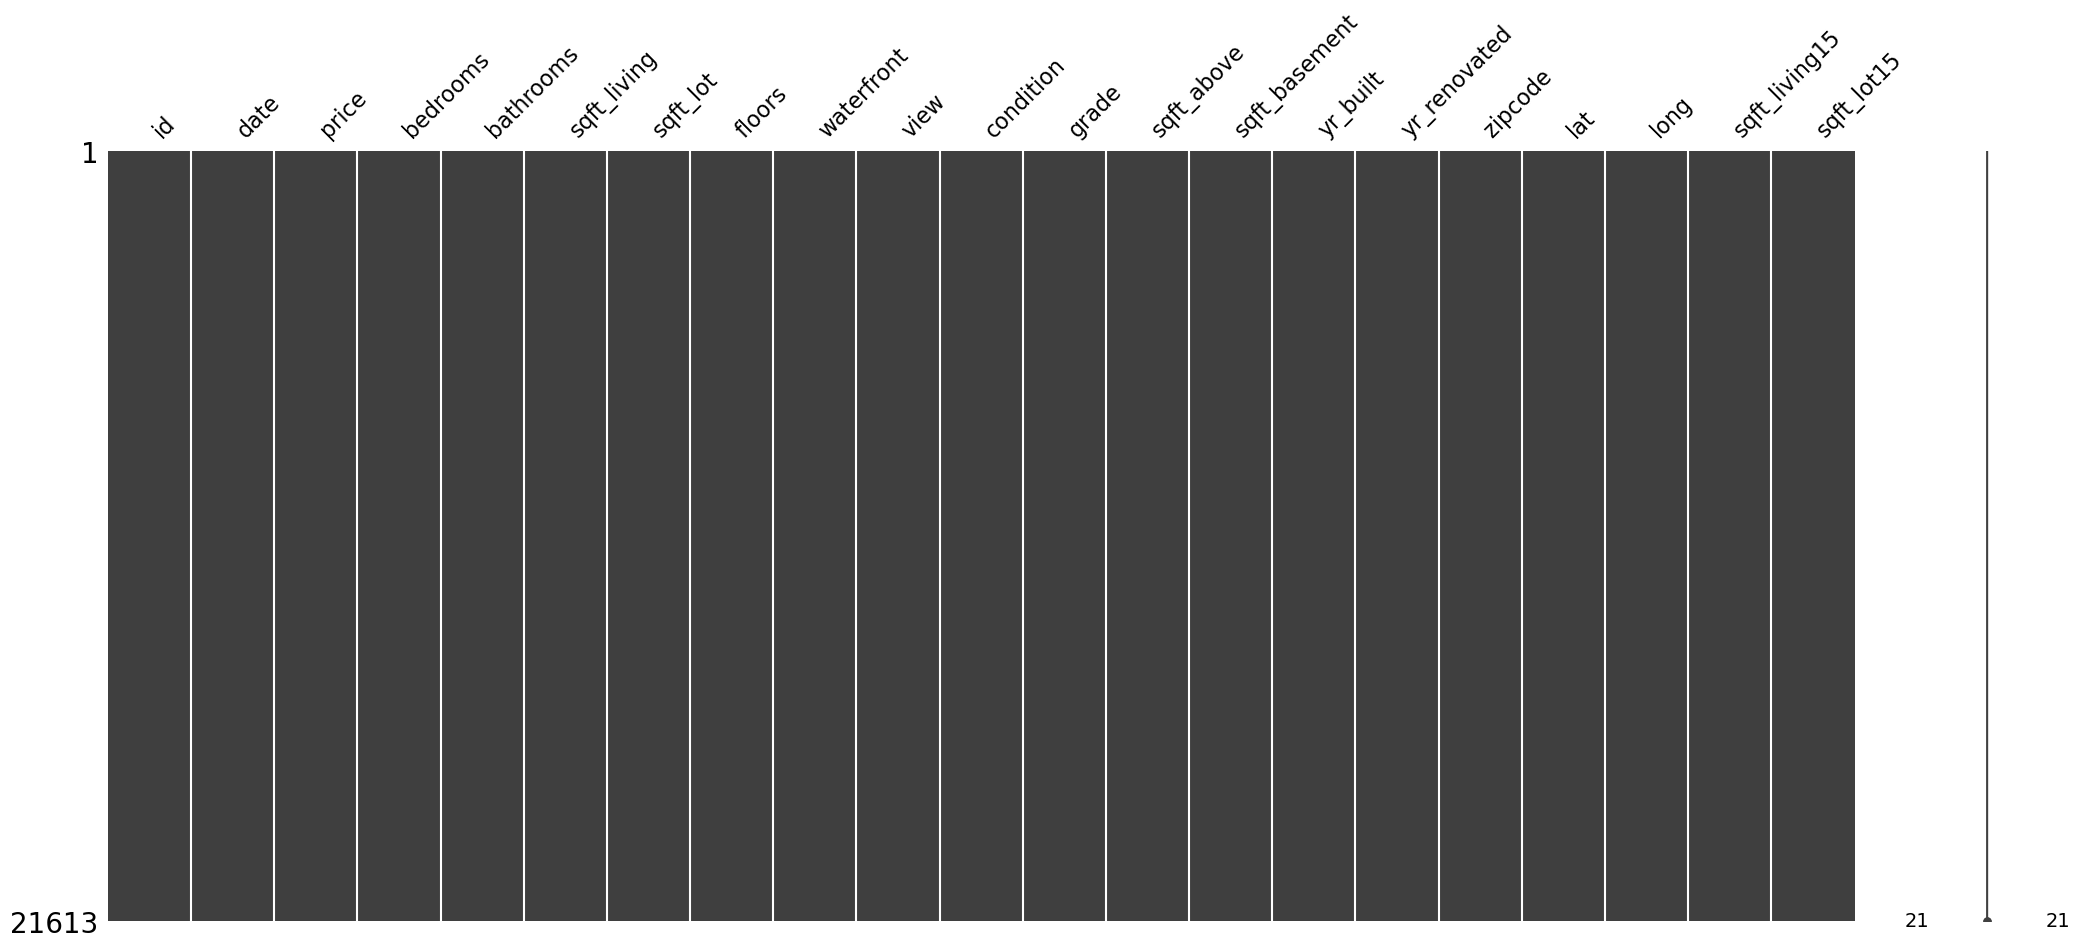

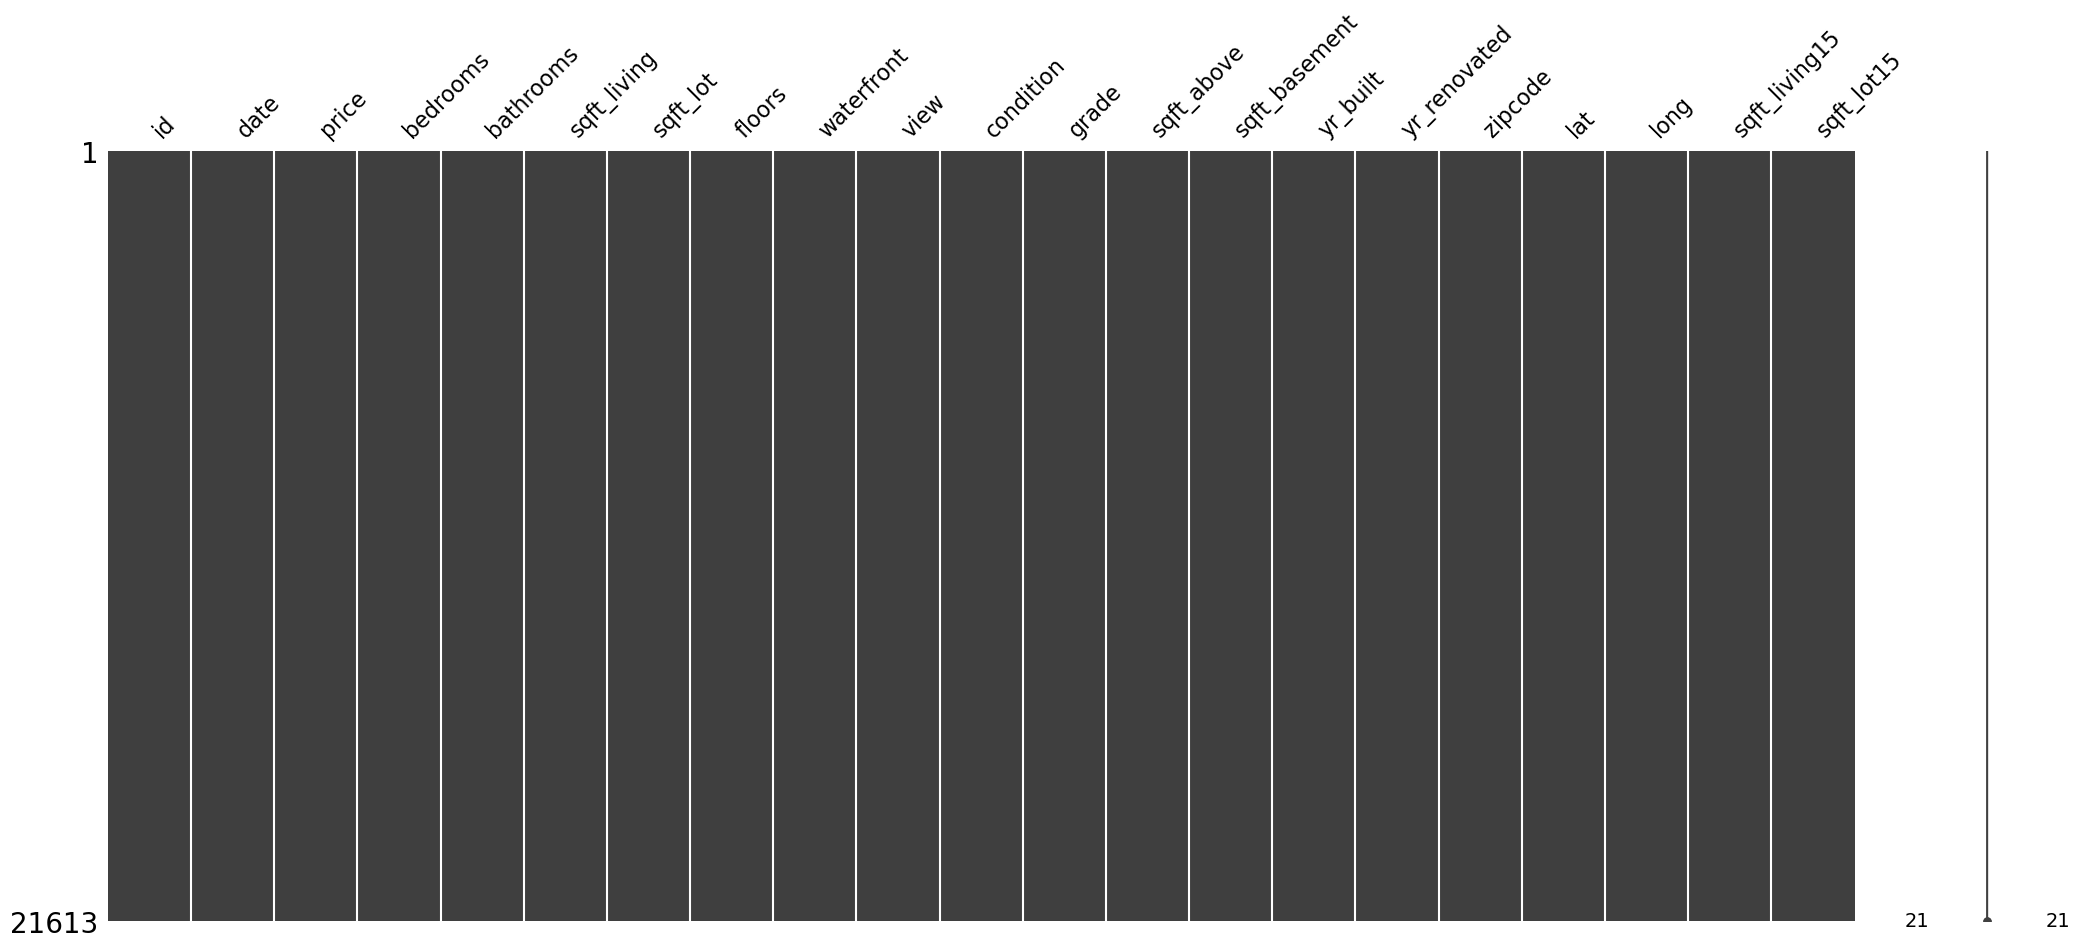

In [11]:
#!pip install missingno
import missingno as msno 

# Visualize missing values as a matrix 
mp= msno.matrix(df)
mp.figure

/var/folders/8f/7qzt4jjj0ws05yr_s_f4nph00000gn/T/ipykernel_81121/2257471362.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot=sns.heatmap(df.corr())


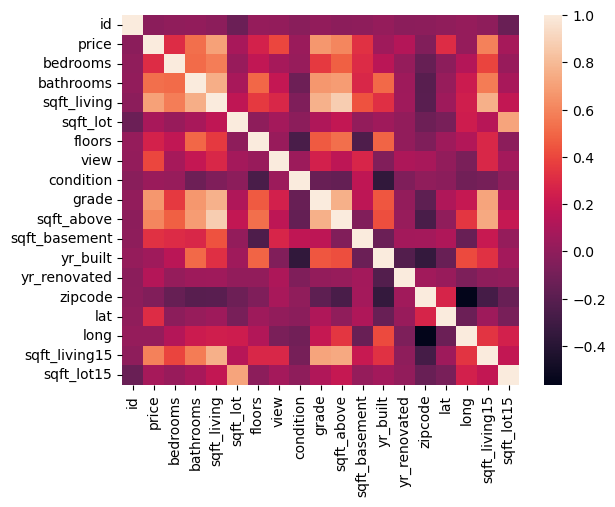

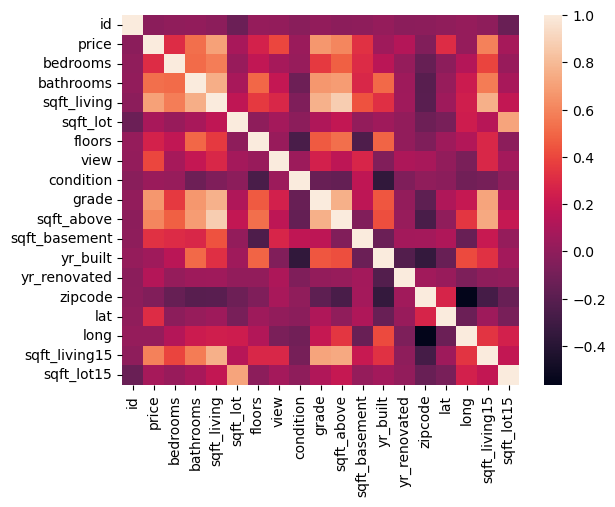

In [16]:
import seaborn as sns
dataplot=sns.heatmap(df.corr()) 
dataplot.figure

In [17]:
matrix = df.corr()
print(matrix)

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.3

/var/folders/8f/7qzt4jjj0ws05yr_s_f4nph00000gn/T/ipykernel_81121/3680268391.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr()


In [18]:
df.condition.unique()
df.waterfront.unique()

array(['N', 'Y'], dtype=object)

In [19]:
df.condition= df.condition.astype('category')
df.condition.cat.categories

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [20]:
df1 =pd.get_dummies(df, columns=['waterfront'], drop_first=True)
df1.head(2)
#df1.describe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  category      
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  int64         
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [21]:
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df1 = df.loc[:, columns]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


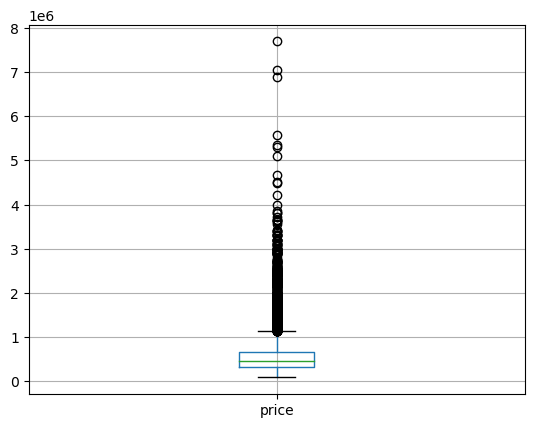

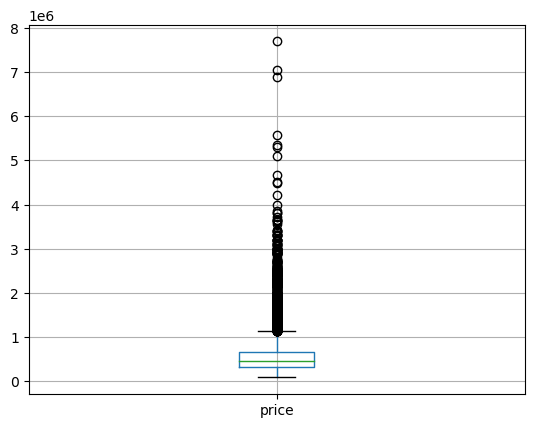

In [22]:
mpn=df.boxplot(column=['price'], return_type='axes')
mpn.figure

#### Splitting the dataframe into Train test 

In [23]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df.loc[:, features]
y = df.loc[:, ['price']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=32,  train_size = .80)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors
9921,4,1.00,1530,5684,1.0
2275,4,2.25,1660,7350,1.0
16705,4,1.75,1850,4388,2.0
15720,4,2.75,2620,6707,2.0
11587,3,1.00,1250,21303,1.0


In [25]:
y_train.head()

,price
9921,325000.0
2275,610000.0
16705,763000.0
15720,672500.0
11587,385000.0


In [130]:
#Importing Packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


# Importing Datasets
url = 'https://raw.githubusercontent.com/datahub126/Datasets/main/kc_house_data.csv'
df = pd.read_csv(url)

# Splitting Data
X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [ ]:
https://machinelearninghd.com/sklearn-metrics-classification-regression/